In [3]:
import array
import struct
import os
import wave 
import csv

In [4]:
def read_loaded_file(audio_path):
    # we are to open the .wav file
    wav_file = wave.open(audio_path, "rb")

    # read audio samples from the audio file
    audio_sample = wav_file.readframes(wav_file.getnframes())
    wav_file.close()

    # convert audio samples into an array
    audio_sample = array.array("h", audio_sample)
    return audio_sample

In [5]:
audio_sample = read_loaded_file("/home/ix502iv/Documents/Audio_Trad/DTW/Lecture/audio/hello2.wav")

In [6]:
# audio_sample

In [7]:
quantization_level = 16

In [11]:
quant_audio = audio_sample
len(quant_audio)
quant_audio[aud]

81

In [14]:
quant_audio[aud]

81

In [22]:
a = 2**15/quantization_level
a

2048.0

In [21]:
b = 2**15/quantization_level
b

2048.0

In [18]:
quant_audio[aud]/a

0.03955078125

In [23]:
for aud in range(len(quant_audio)):
    quant_audio[aud] = int((quant_audio[aud]/(2**15/quantization_level)) * (2**15/quantization_level))

    # int(quant_audio[aud]/(2**15/quantization_level)) * (2**15/quantization_level)

encod_audio = struct.pack("h"*len(quant_audio), *quant_audio)

In [45]:
with open("encoded_output.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    for enc_aud in encod_audio:
        writer.writerow([enc_aud])

In [38]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pydub import AudioSegment

encoded_output = pd.read_csv('./encoded_output.csv', header=None)

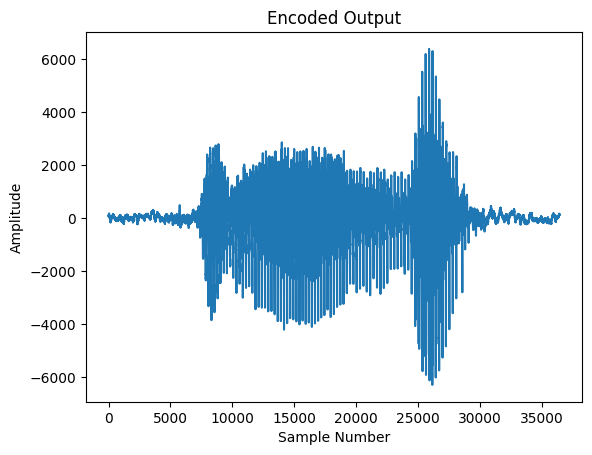

In [47]:
# plot the encoded output

# plt.plot(encoded_output)
plt.plot(audio_sample)
plt.title('Encoded Output')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')

plt.show()

In [40]:
# convert the csv data into an array
array_audio = encoded_output.to_numpy()

* the `audio_sample` is already in an array format before saving it into csv file

In [50]:
import IPython.display as ipyd
ipyd.Audio(rate=32000, data=audio_sample)